In [6]:
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib import gridspec

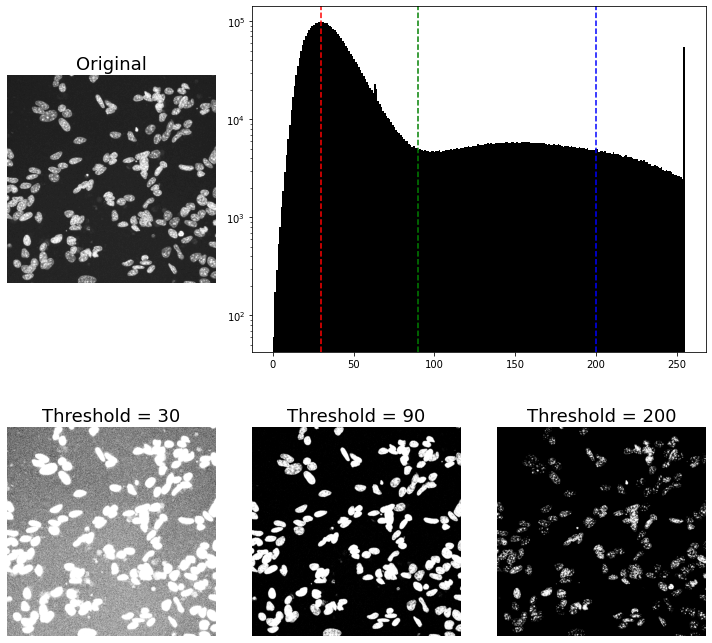

In [7]:
img = imread("nuclei_DAPI.tif")

fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

ax1.imshow(img, cmap="gray")
ax1.axis("off")
ax1.set_title("Original", fontsize=18)
ax2.hist(img.ravel(), bins=256, log=True, color="black")
ax2.axvline(30, color="red", linestyle="--")
ax2.axvline(90, color="green", linestyle="--")
ax2.axvline(200, color="blue", linestyle="--")
ax3.imshow(img > 30, cmap="gray")
ax3.axis("off")
ax3.set_title("Threshold = 30", fontsize=18)
ax4.imshow(img > 90, cmap="gray")
ax4.axis("off")
ax4.set_title("Threshold = 90", fontsize=18)
ax5.imshow(img > 200, cmap="gray")
ax5.axis("off")
ax5.set_title("Threshold = 200", fontsize=18)
plt.tight_layout()

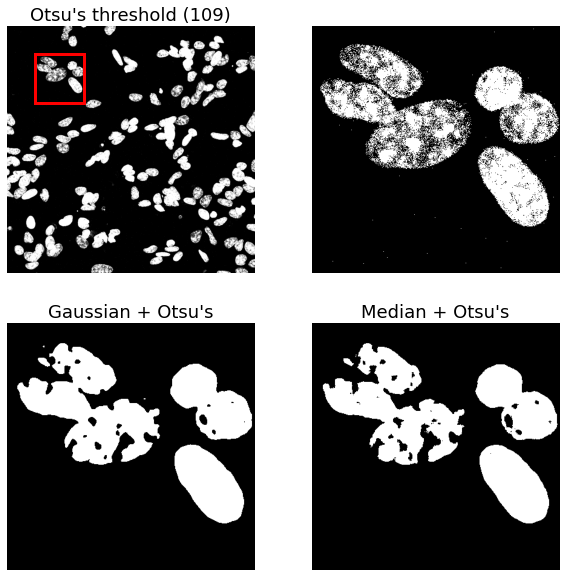

In [9]:
from skimage.filters import threshold_otsu, gaussian, median
from skimage import img_as_ubyte
from matplotlib.patches import Rectangle
import numpy as np

t = threshold_otsu(img)

img_gauss = gaussian(img, 3)
img_median = median(img, selem=np.ones((10, 10)))

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
ax[0,0].imshow(img > t, cmap="gray")
# Draw a rectangle at (200;200) with side 500 pixels
r = Rectangle((230, 230), 410, 410, color="red", linewidth=3, fill=None)
ax[0,0].add_patch(r)

ax[0,1].imshow(img[230:640, 230:640] > t, cmap="gray")

ax[1,0].imshow(img_as_ubyte(img_gauss[230:640, 230:640]) > t, cmap="gray")
ax[1,1].imshow(img_as_ubyte(img_median[230:640, 230:640]) > t, cmap="gray")

for a in ax.ravel():
    a.axis("off")

ax[0,0].set_title(f"Otsu's threshold ({t})", fontsize=18)
ax[1,0].set_title(f"Gaussian + Otsu's", fontsize=18)
ax[1,1].set_title(f"Median + Otsu's", fontsize=18)

plt.show()

Text(0.5, 1.0, 'Closing + dilation')

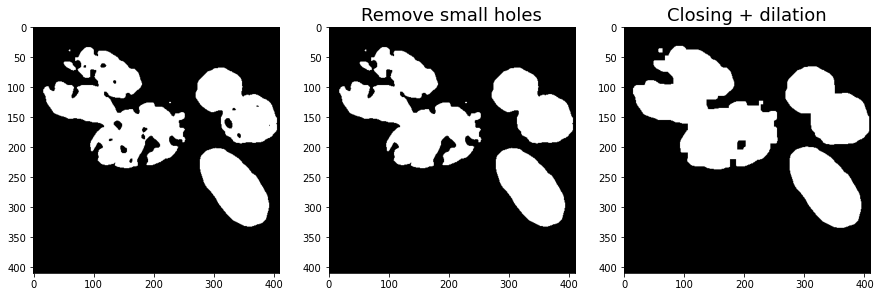

In [32]:
from skimage.morphology import remove_small_holes, dilation, closing
from skimage import img_as_ubyte

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
img_thresh = img_as_ubyte(img_gauss[230:640, 230:640]) > t
img_filled = remove_small_holes(img_thresh, 
    area_threshold=200)

img_filled_2 = closing(dilation(img_thresh, selem=np.ones((5, 5))), 
    selem=np.ones((10, 10)))

ax[0].imshow(img_thresh, cmap="gray")
ax[1].imshow(img_filled, cmap="gray")
ax[1].set_title("Remove small holes", fontsize=18)
ax[2].imshow(img_filled_2, cmap="gray")
ax[2].set_title("Closing + dilation", fontsize=18)

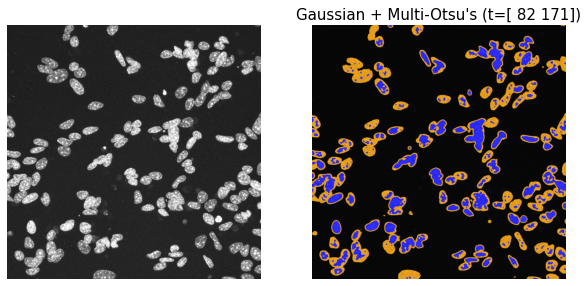

In [36]:
from skimage.filters import threshold_multiotsu, gaussian
from skimage import img_as_ubyte
import numpy as np
from skimage.color import label2rgb

t = threshold_multiotsu(img, classes=3)

img_gaus = img_as_ubyte(gaussian(img, 5))
img_thr = np.digitize(img, t)
img_thr_gaus = np.digitize(img_gaus, t)

img_with_overlay = label2rgb(img_thr, image = img, bg_label=0, colors = ["orange", "blue"], alpha = .8)
img_with_overlay_gaus = label2rgb(img_thr_gaus, image = img, bg_label=0, colors = ["orange", "blue"], alpha = .8)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(img_with_overlay_gaus)
for a in ax:
    a.axis("off")
ax[1].set_title(f"Gaussian + Multi-Otsu's (t={t})", fontsize=15)
plt.show()